# Presentation Notebook:

### Notebook to summarize everything covered in previous notebooks

- Introduction: Project Background (Dataset & Objective)
- Python Imports
- Preliminary Analysis (NAs, Imbalanced?, Metadata)
- Variable Analysis (Boxplots)
- Feature Engineering for each row: (mean, std, rounding, ect.)
- Scaling each variable: (StandardScaler, Min_Max, Normalizer)
- Under/Oversampling: (RandomUndersample, SMOTE, SMOTETomek)
- Algorithms pros/cons of each: (Logistic_Regression, KNN, Random_Forest, SVM, LightGBM)
- ROC/PR Curves
- Best Algorithm and Final Results

# Customer Transaction Prediction

![title](../../Images/santander_logo.png)

<hr>

# Introduction: Project Background

### This project is based on a Machine Learning Competition on Kaggle.com

https://www.kaggle.com/c/santander-customer-transaction-prediction

### If we were to open up train.csv in Excel:
- It would take about a minute to even open...
- and it would look like this:

![title](../../Images/Excel.png)

<hr>

# Python Imports:

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=2)

<hr>

# Preliminary Analysis:

### What do these Datasets look like? Let's find out using a Pandas Dataframe

In [7]:
# Import train data
train_csv_path = os.path.join("..","..","data","train.csv")
train_data = pd.read_csv(train_csv_path)
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
print("Dataset Shape\nRows:{0}\nColumns:{1}".format(train_data.shape[0],train_data.shape[1]))

Dataset Shape
Rows:200000
Columns:202


In [9]:
# import test data
test_csv_path = os.path.join("..","..","data","test.csv")
test_data = pd.read_csv(test_csv_path)
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [10]:
print("Dataset Shape\nRows:{0}\nColumns:{1}".format(test_data.shape[0],test_data.shape[1]))

Dataset Shape
Rows:200000
Columns:201


In [6]:
# import sample_submission data
sample_submission_csv_path = os.path.join("..","..","data","sample_submission.csv")
sample_submission_data = pd.read_csv(sample_submission_csv_path)
sample_submission_data.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [12]:
print("Dataset Shape\nRows:{0}\nColumns:{1}".format(sample_submission_data.shape[0],sample_submission_data.shape[1]))

Dataset Shape
Rows:200000
Columns:2


### Observations:
- There are 200,000 Rows of training data and testing data
- There are 200 Variables of unknown significance.

### Is there any missing data? (aka: Is any data labeled NA?)

In [15]:
# Check for null values
print(f"Missing values in the Training Dataset: {train_data.isnull().values.any()}")
print(f"Missing values in the Testing Dataset: {train_data.isnull().values.any()}")

Missing values in the Training Dataset: False
Missing values in the Testing Dataset: False


### Is the dataset balanced? (Are there more 0's than 1's)

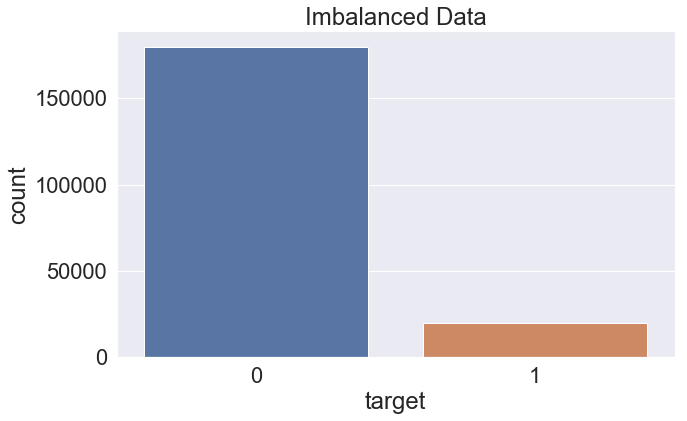

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="target", data=train_data, ax=ax)
ax.set_title("Imbalanced Data")
plt.show()

In [31]:
target_df = pd.DataFrame(train_data.target.value_counts())
target_df["Percentage"] = 100*target_df["target"]/train_data.shape[0]
target_df

,target,Percentage
0,179902,89.951
1,20098,10.049


### Observations:
- ~90% of the training data has a target of 0.
- This could mean maybe we are trying to calculate Fraudulant Customer Transactions? Not sure

### What does the metadata look like?

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [33]:
print(f"Datatype of target: {train_data.target.dtype}")
print(f"Datatype of variables: {train_data.var_0.dtype}")

Datatype of target: int64
Datatype of variables: float64


### Observations:
- 200 columns of variables are floating point numbers
- They have a maximum of 4 decimal places
- Consists of both positive and negative numbers

<hr>

# Feature Analysis:

<hr>

## Too Early Machine Learning Model:

### First we need to seperate the TARGET values from the FEATURES.

In [1]:
# Split to X and y

### Next we need to train_test_split the training data. WHY?
- We want a supervised machine learning model (meaning we want to know the correct answers to judge if it is indeed a good model)
- We can split the data into a train and test set. We'll use 70% of the data for training our model, and 30% of the data for testing our model accuracy.

In [3]:
# train_test_split

### Finally lets plug in a simple LogisticRegression model and see what happens:

In [5]:
# LogisticRegression print classification report

### Analysis:

<hr>

## Feature Engineering:

<hr>

## Feature Scaling:

<hr>

## UnderSampling & OverSampling:

<hr>

## Algorithms:

For Each Algorithm:
- Define classification technique
- Useful Parameters
- Pros / Cons
- Classification Report Analysis

#### Lets use the same train_test_split as we did before and try algorithms again:

### Logistic Regresssion:

In [ ]:
# Run model and Run Classification Report: